<a href="https://colab.research.google.com/github/vishesh1111/PythonGoogleColab/blob/master/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as nop
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
#STEPS INVOLVED
# 0. Preprocess + EDA + Feautres Selection
# 1. Extract I/P and O/P Cells
# 2. Scale the values
# 3. train the test split
# 4. train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model/ integrate in software

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


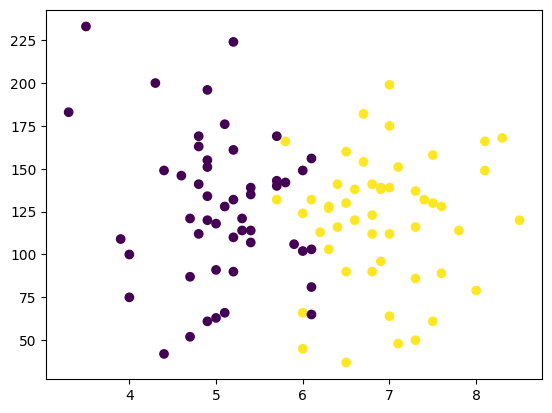

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
Y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

In [ ]:
X_train

,cgpa,iq
41,5.4,114.0
28,5.2,90.0
39,4.6,146.0
86,5.1,128.0
81,5.4,107.0
...,...,...
75,4.8,169.0
62,6.0,102.0
89,4.9,151.0
21,7.1,151.0


In [ ]:
Y_test

,placement
56,0
90,1
68,0
50,0
91,1
31,0
5,1
29,1
34,0
92,0


In [ ]:
Y_train

,placement
41,0
28,0
39,0
86,0
81,0
...,...
75,0
62,0
89,0
21,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)


In [ ]:
X_train

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.06434668, -1.56539619],
       [ 1.16743261, -1.01228368],
       [-1.86605371, -1.30200928],
       [-2.32567285,  2.85950386],
       [ 1.35128027,  0.88410205],
       [-1.95797753, -0.40649379],
       [ 0.98358496, -2.01315393],
       [ 0.89166113, -0.32747772],
       [-1.13066308,  1.01579551],
       [-0.76296777, -0.3801551 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
Y_pred = clf.predict(X_test)

# Display the first few predictions
print("First 10 predictions:", Y_pred[:10])

First 10 predictions: [1 1 0 0 1 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

Accuracy of the Logistic Regression model: 0.90


<Axes: >

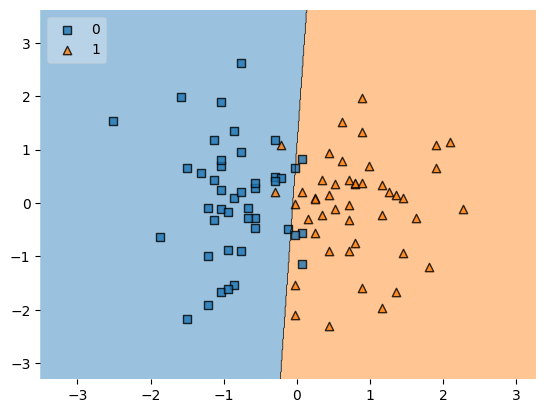

In [ ]:
from mlxtend.plotting import  plot_decision_regions

plot_decision_regions(X_train, Y_train.values, clf=clf, legend = 2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))